In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
fr_df = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7', sep=";", header=0)
fr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dep     14847 non-null  object
 1   sexe    14850 non-null  int64 
 2   jour    14850 non-null  object
 3   hosp    14850 non-null  int64 
 4   rea     14850 non-null  int64 
 5   rad     14850 non-null  int64 
 6   dc      14850 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 812.2+ KB


In [3]:
delete2A2B = fr_df[(fr_df['dep'] == "2A")|(fr_df['dep'] == "2B")].index
fr_df.drop(delete2A2B , inplace=True)
fr_df['dep'] = fr_df['dep'].fillna(0).astype(np.int64)
fr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14556 entries, 0 to 14849
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dep     14556 non-null  int64 
 1   sexe    14556 non-null  int64 
 2   jour    14556 non-null  object
 3   hosp    14556 non-null  int64 
 4   rea     14556 non-null  int64 
 5   rad     14556 non-null  int64 
 6   dc      14556 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 909.8+ KB


In [4]:
idf_df = fr_df[(fr_df['dep']==75) | (fr_df['dep']==77) | (fr_df['dep']==78) | (fr_df['dep']==91) | (fr_df['dep']==92) | (fr_df['dep']==93) | (fr_df['dep']==94) | (fr_df['dep']==95)]
idf_df = idf_df.reset_index(drop=True)
idf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dep     1176 non-null   int64 
 1   sexe    1176 non-null   int64 
 2   jour    1176 non-null   object
 3   hosp    1176 non-null   int64 
 4   rea     1176 non-null   int64 
 5   rad     1176 non-null   int64 
 6   dc      1176 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 64.4+ KB


In [5]:
idf_df.head()

dep  sexe        jour  hosp  rea  rad  dc
0   75     0  2020-03-18   359  105   40  14
1   75     1  2020-03-18   217   70   22  10
2   75     2  2020-03-18   139   35   18   4
3   77     0  2020-03-18    25   13   10   0
4   77     1  2020-03-18    15   12    6   0

In [6]:
cumulative=idf_df[(idf_df['sexe']!=0)].index
idf_df.drop(cumulative, inplace=True)
idf_df = idf_df.reset_index(drop=True)
idf_df['dep'] = idf_df['dep'].astype('category')
print(idf_df)

    dep  sexe        jour  hosp  rea   rad   dc
0    75     0  2020-03-18   359  105    40   14
1    77     0  2020-03-18    25   13    10    0
2    78     0  2020-03-18    69   18     5    5
3    91     0  2020-03-18    51   16     0    1
4    92     0  2020-03-18   149   48    22    4
..   ..   ...         ...   ...  ...   ...  ...
387  91     0  2020-05-05  1051  130  1385  432
388  92     0  2020-05-05  1664  222  3000  909
389  93     0  2020-05-05  1418  168  2353  862
390  94     0  2020-05-05  1726  228  2657  970
391  95     0  2020-05-05   864   75  1774  600

[392 rows x 7 columns]


In [7]:
rea=idf_df['rea']
hosp=idf_df['hosp']
idf_df = idf_df.assign(reaperhosp=pd.Series(np.divide(rea,hosp)*100))
idf_df.head()

dep  sexe        jour  hosp  rea  rad  dc  reaperhosp
0  75     0  2020-03-18   359  105   40  14   29.247911
1  77     0  2020-03-18    25   13   10   0   52.000000
2  78     0  2020-03-18    69   18    5   5   26.086957
3  91     0  2020-03-18    51   16    0   1   31.372549
4  92     0  2020-03-18   149   48   22   4   32.214765

In [8]:
def bs_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bs_replicate_1d(data, func)
    return bs_replicates

data=idf_df['reaperhosp'] 

In [9]:
bs_replicates = draw_bs_reps(data, np.mean, 500)
print(bs_replicates)

[20.11490966 19.71922802 20.09946812 20.16980744 20.22631343 19.91244126
 20.20195755 19.7039493  19.95524623 20.21690104 20.02706472 20.25406824
 20.07830279 20.07179453 20.09503858 20.0531416  20.35722244 20.5925254
 20.66653641 20.39511009 20.87149837 20.07928782 20.00316787 19.91025008
 19.73902759 20.19168254 20.15230817 20.13391215 19.59857328 20.24568363
 20.30806459 20.37486779 20.47070978 20.46648122 20.27014403 20.56802327
 20.27597409 20.37354148 19.88587018 20.24222688 20.07566496 19.20964531
 20.46906053 20.4224104  20.23607086 20.11644978 20.184342   20.15694308
 19.89386992 19.60755895 20.81446533 20.40189182 20.00255707 19.83938738
 20.64100489 20.02318849 20.44411706 20.35557872 20.13769854 19.57122324
 20.28369422 20.1091424  20.24970521 20.28115355 19.87701505 20.52974346
 19.80310043 19.64924863 20.4003321  20.46054848 19.83452867 20.00130563
 20.02639384 20.19552541 19.7105245  20.26124496 20.35931521 20.37789403
 19.81005497 20.16122662 20.4618445  20.07303535 20.

In [10]:
sem=np.std(data) / np.sqrt(len(data))
print(sem)

0.2925589840405655


In [11]:
bs_std = np.std(bs_replicates)
print(bs_std)

0.2764073822349935


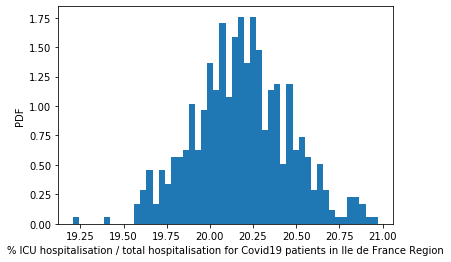

In [12]:
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('% ICU hospitalisation / total hospitalisation for Covid19 patients in Ile de France Region')
_ = plt.ylabel('PDF')